In [71]:
import yfinance as yf
import pandas as pd

#getting data from yfinance
data = yf.download('EURUSD=X', start='2023-08-01', end='2024-08-01')
close = data['Close']

#DataFrame
df = pd.DataFrame(close)
df.reset_index(inplace=True)
print(df)

[*********************100%%**********************]  1 of 1 completed

          Date     Close
0   2023-08-01  1.099759
1   2023-08-02  1.100788
2   2023-08-03  1.094415
3   2023-08-04  1.095158
4   2023-08-07  1.100267
..         ...       ...
256 2024-07-25  1.083952
257 2024-07-26  1.085128
258 2024-07-29  1.085376
259 2024-07-30  1.081947
260 2024-07-31  1.081607

[261 rows x 2 columns]


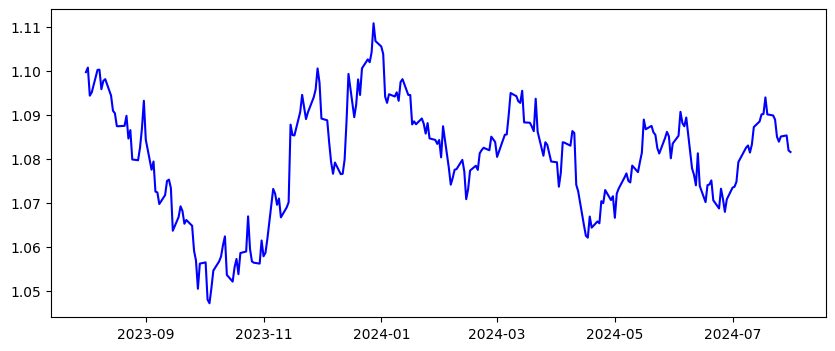

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['Date'],df['Close'],color = 'blue')


# Split the data in sample and out of sample

In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.15, shuffle=False)


# Apply Seasonal trend decomposition aka STL on close prices using statsmodels

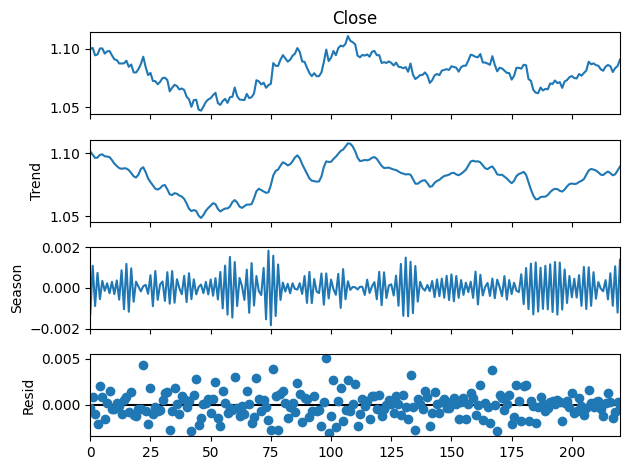

In [74]:
from statsmodels.tsa.seasonal import STL

stl = STL(train['Close'], period=2)
result = stl.fit()

#visualisation
result.plot()
plt.show()

# visualisation of residual as histogram

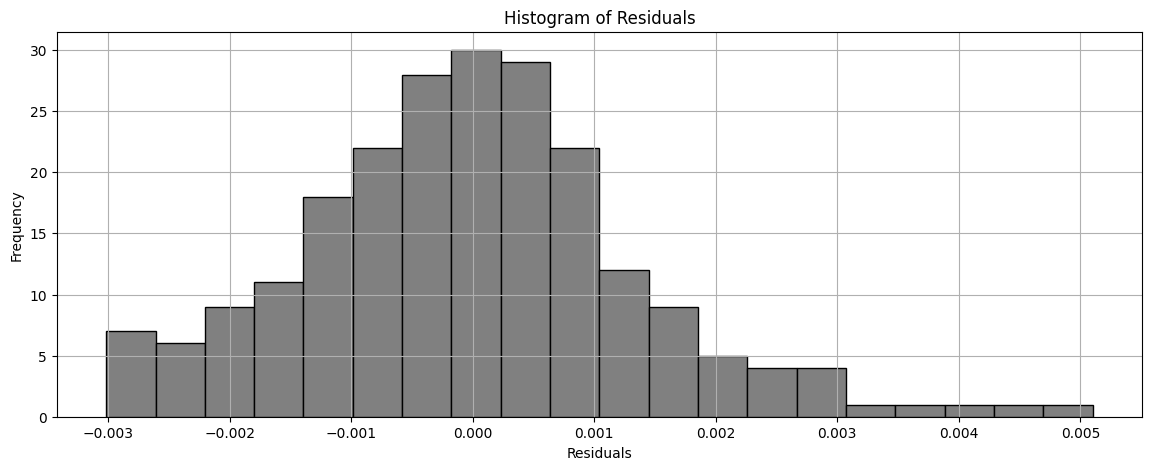

In [75]:
plt.figure(figsize=(14, 5))
plt.hist(result.resid, bins=20 ,color='gray', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

# finding thresholds

when the residual value  is higher than upthreshold so it's a signal of sell,and if it's lower than lowthreshold it's a signal of buy.

In [76]:
rs_mean = result.resid.mean()
rs_std = result.resid.std()
UPthreshold = rs_mean + 2 * rs_std
LOWthreshold = rs_mean - 2 * rs_std

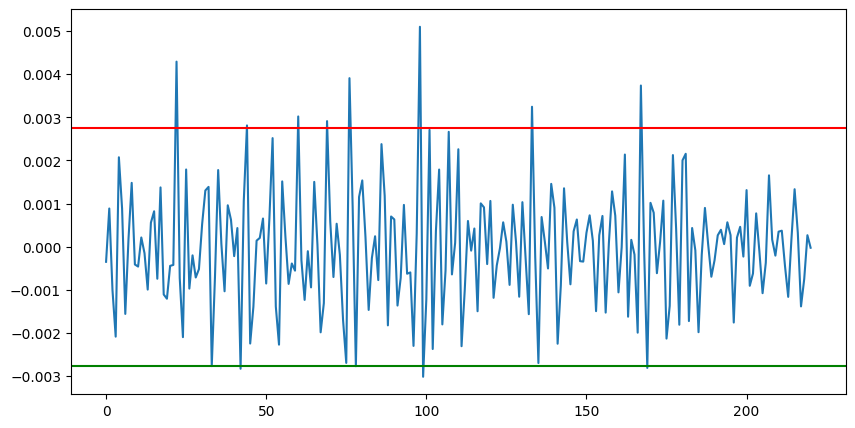

In [77]:
train['buy_signal'] = result.resid > UPthreshold
train['sell_signal'] = result.resid < LOWthreshold
plt.figure(figsize = (10,5))
plt.plot(train.index, result.resid)
plt.axhline(y=UPthreshold, color='red')
plt.axhline(y=LOWthreshold, color='green')


In [78]:
position = 0 #(1 for long , -1 for short ,0 for no position)
cumul = 0
profits = []
positionprice = 0

for i in range(len(train)):
    if train['buy_signal'].iloc[i] and position != 1:
        position = 1
        positionprice = train['Close'].iloc[i]
        print(f"buy {positionprice} on {train['Date'].iloc[i]}")
    elif train['sell_signal'].iloc[i] and position != -1 :
        position = -1
        positionprice = train['Close'].iloc[i]
        print(f"sell {positionprice} on {train['Date'].iloc[i]}")


    if position == 1:
        profit = train['Close'].iloc[i] - positionprice
    elif position == -1 :
        profit = positionprice - train['Close'].iloc[i]
    else :
        profit = 0

    cumul = cumul + profit
    profits.append(cumul)

buy 1.0932546854019165 on 2023-08-31 00:00:00
sell 1.0637166500091553 on 2023-09-15 00:00:00
buy 1.0565240383148193 on 2023-10-02 00:00:00
sell 1.0853756666183472 on 2023-11-17 00:00:00
buy 1.0993602275848389 on 2023-12-15 00:00:00
sell 1.0895264148712158 on 2023-12-18 00:00:00
buy 1.0874648094177246 on 2024-02-02 00:00:00
sell 1.0807539224624634 on 2024-03-25 00:00:00


In [79]:
buy_signals

,Date,Close,buy_signal,sell_signal,Cumulative Profit
22,2023-08-31,1.093255,True,False,0.000000
44,2023-10-02,1.056524,True,False,-0.167014
60,2023-10-24,1.066985,True,False,-0.176131
69,2023-11-06,1.073215,True,False,-0.142654
76,2023-11-15,1.087831,True,False,-0.031726
98,2023-12-15,1.099360,True,False,-0.044104
133,2024-02-02,1.087465,True,False,-0.193503
167,2024-03-21,1.093721,True,False,-0.327507


Text(0.5, 1.0, 'Cumulative Profit')

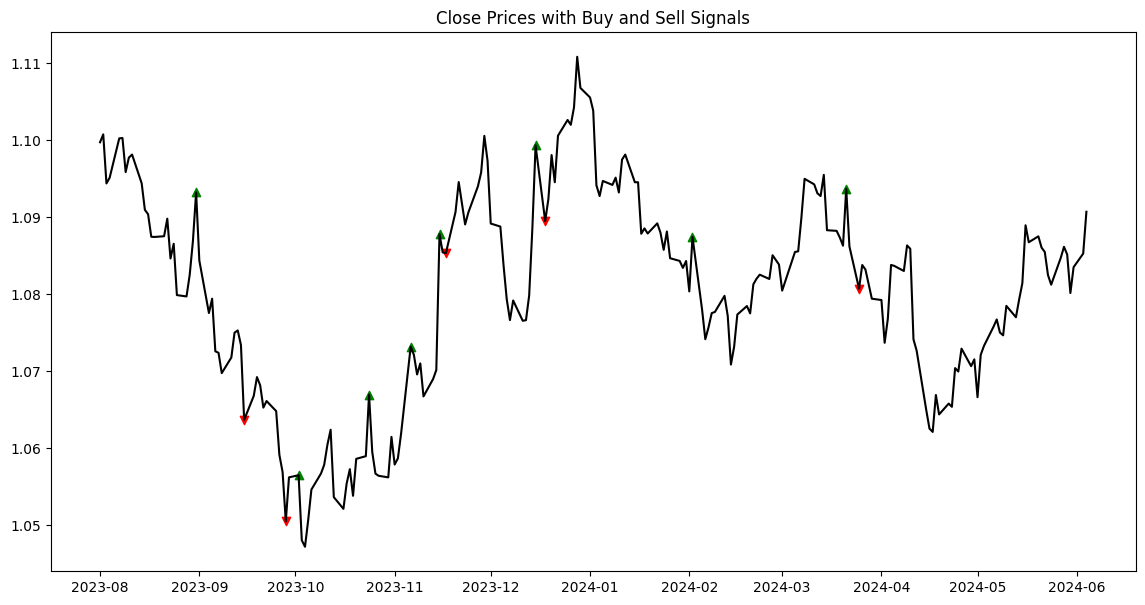

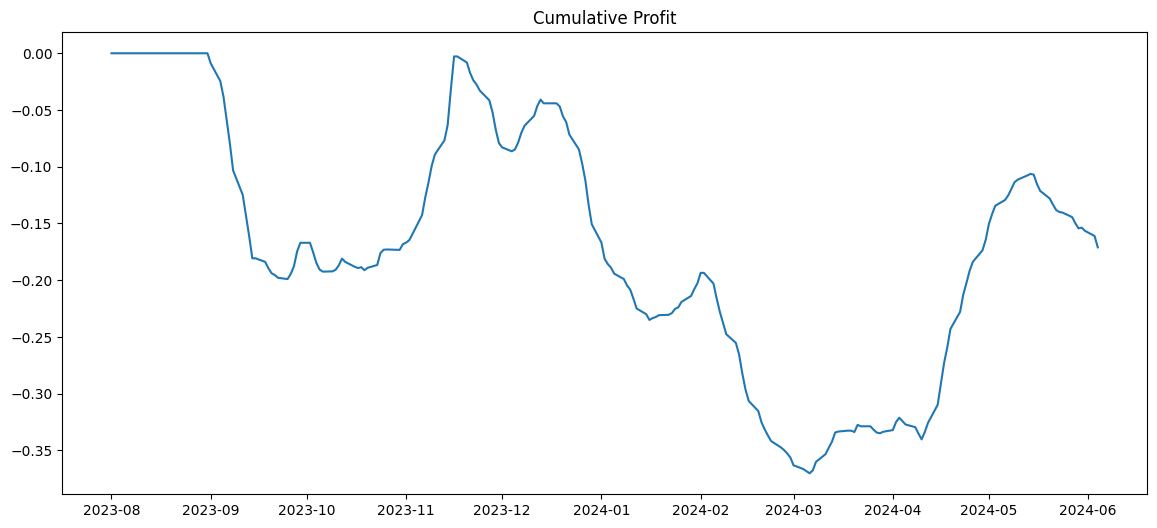

In [80]:
plt.figure(figsize=(14, 7))
plt.plot(dates, close_prices,label = 'Close price',color = 'black')
#isolate the true value of buy_signals and sell signals from the frame
buy_signals = train[train['buy_signal']]
sell_signals = train[train['sell_signal']]
#draw the marker that indicate the signal
plt.scatter(buy_signals['Date'],buy_signals['Close'],marker = '^',color = 'green')
plt.scatter(sell_signals['Date'],sell_signals['Close'],marker = 'v',color = 'red')
plt.title('Close Prices with Buy and Sell Signals')
# Cumulative Profit
plt.figure(figsize=(14,6))
plt.plot(dates, profits, label='Cumulative Profit')
plt.title('Cumulative Profit')